In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [ ]:


OUTPUT_DIR = "/Users/brandon/Documents/synth_data_proj/data/data_outputs/"
UTILITY_PATH = os.path.join(OUTPUT_DIR, "utility_results.csv")

# Load AUCs
with open(os.path.join(OUTPUT_DIR, "model_mia_auc.json")) as f:
    MIA_AUCs = json.load(f)


In [ ]:
# Load utility results
utility_df = pd.read_csv(UTILITY_PATH)


In [4]:
# Filter to just Random Forest 
rf_results = utility_df[
    (utility_df["Model"] == "RandomForest") &
    (utility_df["Trained_On"] != "Real")  # exclude real data from privacy analysis
]


In [5]:
print("MIA AUCs loaded:", MIA_AUCs)
print("Models in rf_results:", rf_results["Trained_On"].unique())



MIA AUCs loaded: {'ctgan': 0.5190705400335273, 'copula': 0.5026882970872489, 'tvae': 0.4982759134085698}
Models in rf_results: ['CTGAN' 'Copula' 'TVAE']


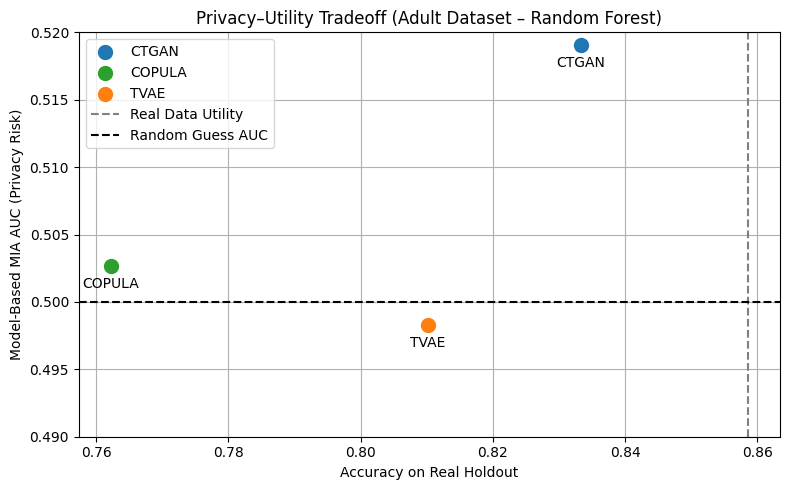

In [ ]:
import matplotlib.pyplot as plt
import os

# Consistent color mapping for all datasets
color_map = {
    "CTGAN": "tab:blue",
    "TVAE": "tab:orange",
    "COPULA": "tab:green"
}


plt.figure(figsize=(8, 5))
used_labels = set()



for _, row in rf_results.iterrows():
    model = row["Trained_On"].upper()
    x = row["Accuracy"]
    key = row["Trained_On"].lower()
    y = MIA_AUCs.get(key, None)
    if y is None:
        continue

    color = color_map.get(model, "gray")
    label = model if model not in used_labels else "_nolegend_"

    plt.scatter(x, y, color=color, label=label, s=100)
    plt.annotate(model, (x, y), textcoords="offset points", xytext=(0, -16), ha='center')
    used_labels.add(model)



# Baseline reference lines
real_acc = utility_df[
    (utility_df["Model"] == "RandomForest") &
    (utility_df["Trained_On"].str.lower() == "real")
]["Accuracy"].values[0]





plt.axvline(real_acc, linestyle="--", color="gray", label="Real Data Utility")
plt.axhline(0.5, linestyle="--", color="black", label="Random Guess AUC")

plt.title("Privacy–Utility Tradeoff (Adult Dataset – Random Forest)")
plt.xlabel("Accuracy on Real Holdout")
plt.ylabel("Model-Based MIA AUC (Privacy Risk)")
plt.ylim(0.49, 0.52)
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "privacy_utility_tradeoff.png"))
plt.show()
